# Init for pyqcu.

In [1]:
import cupy as cp
import numpy as np
from pyqcu import define
from pyqcu import io
from pyqcu import qcu
from pyqcu import eigen, cg
from pyqcu.set import params, argv, set_ptrs
params[define._NODE_RANK_] = define.rank
params[define._NODE_SIZE_] = define.size
kappa = 1 / (2 * argv[define._MASS_] + 8)
print('My rank is ', define.rank)
gauge_filename = f"quda_wilson-bistabcg-gauge_-{params[define._LAT_X_]}-{params[define._LAT_Y_]}-{params  [define._LAT_Z_]}-{params[define._LAT_T_]}-{params[define._LAT_XYZT_]}-{params[define._GRID_X_]}-{params[define._GRID_Y_]}-{params[define._GRID_Z_]}-{params[define._GRID_T_]}-{params[define._PARITY_]}-{params[define._NODE_RANK_]}-{params[define._NODE_SIZE_]}-{params[define._DAGGER_]}-f.h5"
print("Parameters:", params)


    @@@@@@######QCU NOTES START######@@@@@@@
    0. Required: MPI(e.g. 4.1.2), CUDA(e.g. 12.4), CMAKE(e.g. 3.22.1), GCC(e.g. 11.4.0), HDF5-MPI(e.g. 1.10.7,'apt install libhdf5-mpi-dev && export HDF5_MPI="ON" && pip install --no-binary=h5py h5py').
    1. The libqcu.so was compiled when pyqcu setup in download_path/PyQCU/lib, please add this path to your LD_LIBRARY_PATH.
    2. The QCU(PyQCU) splite grid by x->y->z->t, lattice by x->y->z->t->p->d->c->c or x->y->z->t->c->s(->p) and x->y->z->t->c->s->c->s(->p).
    3. The QUDA(PyQUDA) splite grid by t->z->y->x, lattice by c->c->x->y->z->t->p->d or c->s->x->y->z->t(->p) and c->s->c->s->x->y->z->t(->p).
    4. The QCU input params in numpy array(dtype=np.int32), argv in  numpy array(dtype=np.float32 or float64) array, set_ptrs in numpy array(dtype=np.int64), other in cupy array(dtype=cp.complex64 or complex128).
    5. The smallest lattice size is (x=4,y=4,z=4,t=8) that QCU support.
    @@@@@@######QCU NOTES END######@@@@@@@
    
Parameter

In [2]:
wilson_cg_params = params.copy()
wilson_cg_params[define._SET_INDEX_] = 0
wilson_cg_params[define._SET_PLAN_] = define._SET_PLAN1_
qcu.applyInitQcu(set_ptrs, wilson_cg_params, argv)

gridDim.x               :4096
blockDim.x              :128
host_params[_LAT_X_]    :16
host_params[_LAT_Y_]    :32
host_params[_LAT_Z_]    :32
host_params[_LAT_T_]    :32
host_params[_LAT_XYZT_] :524288
host_params[_GRID_X_]   :1
host_params[_GRID_Y_]   :1
host_params[_GRID_Z_]   :1
host_params[_GRID_T_]   :1
host_params[_PARITY_]   :0
host_params[_NODE_RANK_]:0
host_params[_NODE_SIZE_]:1
host_params[_DAGGER_]   :0
host_params[_MAX_ITER_] :10000
host_params[_SET_INDEX_]:0
host_params[_SET_PLAN_] :1
host_argv[_MASS_]       :0.000000e+00
host_argv[_TOL_]        :1.000000e-09
lat_2dim[_XY_]          :512
lat_2dim[_XZ_]          :512
lat_2dim[_XT_]          :512
lat_2dim[_YZ_]          :1024
lat_2dim[_YT_]          :1024
lat_2dim[_ZT_]          :1024
lat_3dim[_YZT_]         :32768
lat_3dim[_XZT_]         :16384
lat_3dim[_XYT_]         :16384
lat_3dim[_XYZ_]         :16384
lat_4dim                :524288
grid_2dim[_XY_]         :1
grid_2dim[_XZ_]         :1
grid_2dim[_XT_]         :1
grid_2

In [3]:
wilson_dslash_eo_params = params.copy()
wilson_dslash_eo_params[define._SET_INDEX_] = 1
wilson_dslash_eo_params[define._SET_PLAN_] = define._SET_PLAN0_
wilson_dslash_eo_params[define._PARITY_] = define._EVEN_
wilson_dslash_eo_params[define._DAGGER_] = define._NO_USE_
qcu.applyInitQcu(set_ptrs, wilson_dslash_eo_params, argv)

gridDim.x               :4096
blockDim.x              :128
host_params[_LAT_X_]    :16
host_params[_LAT_Y_]    :32
host_params[_LAT_Z_]    :32
host_params[_LAT_T_]    :32
host_params[_LAT_XYZT_] :524288
host_params[_GRID_X_]   :1
host_params[_GRID_Y_]   :1
host_params[_GRID_Z_]   :1
host_params[_GRID_T_]   :1
host_params[_PARITY_]   :0
host_params[_NODE_RANK_]:0
host_params[_NODE_SIZE_]:1
host_params[_DAGGER_]   :0
host_params[_MAX_ITER_] :10000
host_params[_SET_INDEX_]:1
host_params[_SET_PLAN_] :0
host_argv[_MASS_]       :0.000000e+00
host_argv[_TOL_]        :1.000000e-09
lat_2dim[_XY_]          :512
lat_2dim[_XZ_]          :512
lat_2dim[_XT_]          :512
lat_2dim[_YZ_]          :1024
lat_2dim[_YT_]          :1024
lat_2dim[_ZT_]          :1024
lat_3dim[_YZT_]         :32768
lat_3dim[_XZT_]         :16384
lat_3dim[_XYT_]         :16384
lat_3dim[_XYZ_]         :16384
lat_4dim                :524288
grid_2dim[_XY_]         :1
grid_2dim[_XZ_]         :1
grid_2dim[_XT_]         :1
grid_2

In [4]:
wilson_dslash_eo_dag_params = params.copy()
wilson_dslash_eo_dag_params[define._SET_INDEX_] = 2
wilson_dslash_eo_dag_params[define._SET_PLAN_] = define._SET_PLAN0_
wilson_dslash_eo_dag_params[define._PARITY_] = define._EVEN_
wilson_dslash_eo_dag_params[define._DAGGER_] = define._USE_
qcu.applyInitQcu(set_ptrs, wilson_dslash_eo_dag_params, argv)

gridDim.x               :4096
blockDim.x              :128
host_params[_LAT_X_]    :16
host_params[_LAT_Y_]    :32
host_params[_LAT_Z_]    :32
host_params[_LAT_T_]    :32
host_params[_LAT_XYZT_] :524288
host_params[_GRID_X_]   :1
host_params[_GRID_Y_]   :1
host_params[_GRID_Z_]   :1
host_params[_GRID_T_]   :1
host_params[_PARITY_]   :0
host_params[_NODE_RANK_]:0
host_params[_NODE_SIZE_]:1
host_params[_DAGGER_]   :1
host_params[_MAX_ITER_] :10000
host_params[_SET_INDEX_]:2
host_params[_SET_PLAN_] :0
host_argv[_MASS_]       :0.000000e+00
host_argv[_TOL_]        :1.000000e-09
lat_2dim[_XY_]          :512
lat_2dim[_XZ_]          :512
lat_2dim[_XT_]          :512
lat_2dim[_YZ_]          :1024
lat_2dim[_YT_]          :1024
lat_2dim[_ZT_]          :1024
lat_3dim[_YZT_]         :32768
lat_3dim[_XZT_]         :16384
lat_3dim[_XYT_]         :16384
lat_3dim[_XYZ_]         :16384
lat_4dim                :524288
grid_2dim[_XY_]         :1
grid_2dim[_XZ_]         :1
grid_2dim[_XT_]         :1
grid_2

In [5]:
wilson_dslash_oe_params = params.copy()
wilson_dslash_oe_params[define._SET_INDEX_] = 3
wilson_dslash_oe_params[define._SET_PLAN_] = define._SET_PLAN0_
wilson_dslash_oe_params[define._PARITY_] = define._ODD_
wilson_dslash_oe_params[define._DAGGER_] = define._NO_USE_
qcu.applyInitQcu(set_ptrs, wilson_dslash_oe_params, argv)

gridDim.x               :4096
blockDim.x              :128
host_params[_LAT_X_]    :16
host_params[_LAT_Y_]    :32
host_params[_LAT_Z_]    :32
host_params[_LAT_T_]    :32
host_params[_LAT_XYZT_] :524288
host_params[_GRID_X_]   :1
host_params[_GRID_Y_]   :1
host_params[_GRID_Z_]   :1
host_params[_GRID_T_]   :1
host_params[_PARITY_]   :1
host_params[_NODE_RANK_]:0
host_params[_NODE_SIZE_]:1
host_params[_DAGGER_]   :0
host_params[_MAX_ITER_] :10000
host_params[_SET_INDEX_]:3
host_params[_SET_PLAN_] :0
host_argv[_MASS_]       :0.000000e+00
host_argv[_TOL_]        :1.000000e-09
lat_2dim[_XY_]          :512
lat_2dim[_XZ_]          :512
lat_2dim[_XT_]          :512
lat_2dim[_YZ_]          :1024
lat_2dim[_YT_]          :1024
lat_2dim[_ZT_]          :1024
lat_3dim[_YZT_]         :32768
lat_3dim[_XZT_]         :16384
lat_3dim[_XYT_]         :16384
lat_3dim[_XYZ_]         :16384
lat_4dim                :524288
grid_2dim[_XY_]         :1
grid_2dim[_XZ_]         :1
grid_2dim[_XT_]         :1
grid_2

In [6]:
wilson_dslash_oe_dag_params = params.copy()
wilson_dslash_oe_dag_params[define._SET_INDEX_] = 4
wilson_dslash_oe_dag_params[define._SET_PLAN_] = define._SET_PLAN0_
wilson_dslash_oe_dag_params[define._PARITY_] = define._ODD_
wilson_dslash_oe_dag_params[define._DAGGER_] = define._USE_
qcu.applyInitQcu(set_ptrs, wilson_dslash_oe_dag_params, argv)

gridDim.x               :4096
blockDim.x              :128
host_params[_LAT_X_]    :16
host_params[_LAT_Y_]    :32
host_params[_LAT_Z_]    :32
host_params[_LAT_T_]    :32
host_params[_LAT_XYZT_] :524288
host_params[_GRID_X_]   :1
host_params[_GRID_Y_]   :1
host_params[_GRID_Z_]   :1
host_params[_GRID_T_]   :1
host_params[_PARITY_]   :1
host_params[_NODE_RANK_]:0
host_params[_NODE_SIZE_]:1
host_params[_DAGGER_]   :1
host_params[_MAX_ITER_] :10000
host_params[_SET_INDEX_]:4
host_params[_SET_PLAN_] :0
host_argv[_MASS_]       :0.000000e+00
host_argv[_TOL_]        :1.000000e-09
lat_2dim[_XY_]          :512
lat_2dim[_XZ_]          :512
lat_2dim[_XT_]          :512
lat_2dim[_YZ_]          :1024
lat_2dim[_YT_]          :1024
lat_2dim[_ZT_]          :1024
lat_3dim[_YZT_]         :32768
lat_3dim[_XZT_]         :16384
lat_3dim[_XYT_]         :16384
lat_3dim[_XYZ_]         :16384
lat_4dim                :524288
grid_2dim[_XY_]         :1
grid_2dim[_XZ_]         :1
grid_2dim[_XT_]         :1
grid_2

In [7]:
print("Set pointers:", set_ptrs)
print("Set pointers data:", set_ptrs.data)

Set pointers: [94506881024368 94506890811872 94506890987088 94506891165840
 94506891303984              0              0              0
              0              0]
Set pointers data: <memory at 0x7f8dabba0100>


# Read from hdf5 files.

In [8]:
print("Gauge filename:", gauge_filename)
gauge = io.hdf5_xxxtzyx2grid_xxxtzyx(params, gauge_filename)
fermion_in_filename = gauge_filename.replace("gauge", "fermion-in")
print("Fermion in filename:", fermion_in_filename)
fermion_in = io.hdf5_xxxtzyx2grid_xxxtzyx(
    params, fermion_in_filename)
fermion_out_filename = gauge_filename.replace("gauge", "fermion-out")
print("Fermion out filename:", fermion_out_filename)
quda_fermion_out = io.hdf5_xxxtzyx2grid_xxxtzyx(
    params, fermion_out_filename)
fermion_out = cp.zeros_like(fermion_in)
print("Fermion out data:", fermion_out.data)
print("Fermion out shape:", fermion_out.shape)
eigenvalues_filename = gauge_filename.replace("gauge", "eigenvalues")
print("Eigenvalues filename:", eigenvalues_filename)
eigenvalues = io.hdf5_xxx2xxx(file_name=eigenvalues_filename)
print("Eigenvalues data:", eigenvalues.data)
print("Eigenvalues shape:", eigenvalues.shape)
eigenvectors_filename = gauge_filename.replace("gauge", "eigenvectors")
print("Eigenvectors filename:", eigenvectors_filename)
eigenvectors = io.eigenvectors2esctzyx(
    params=params, eigenvectors=io.hdf5_xxx2xxx(file_name=eigenvectors_filename))
print("Eigenvectors data:", eigenvectors.data)
print("Eigenvectors shape:", eigenvectors.shape)

Gauge filename: quda_wilson-bistabcg-gauge_-32-32-32-32-1048576-1-1-1-1-0-0-1-0-f.h5
Grid Index T: 0, Grid Index Z: 0, Grid Index Y: 0, Grid Index X: 0
Grid Lat T: 32, Grid Lat Z: 32, Grid Lat Y: 32, Grid Lat X: 16
All Dest Shape: (3, 3, 4, 2, 32, 32, 32, 16)
Dest Shape: (3, 3, 4, 2, 32, 32, 32, 16)
Fermion in filename: quda_wilson-bistabcg-fermion-in_-32-32-32-32-1048576-1-1-1-1-0-0-1-0-f.h5
Grid Index T: 0, Grid Index Z: 0, Grid Index Y: 0, Grid Index X: 0
Grid Lat T: 32, Grid Lat Z: 32, Grid Lat Y: 32, Grid Lat X: 16
All Dest Shape: (2, 4, 3, 32, 32, 32, 16)
Dest Shape: (2, 4, 3, 32, 32, 32, 16)
Fermion out filename: quda_wilson-bistabcg-fermion-out_-32-32-32-32-1048576-1-1-1-1-0-0-1-0-f.h5
Grid Index T: 0, Grid Index Z: 0, Grid Index Y: 0, Grid Index X: 0
Grid Lat T: 32, Grid Lat Z: 32, Grid Lat Y: 32, Grid Lat X: 16
All Dest Shape: (2, 4, 3, 32, 32, 32, 16)
Dest Shape: (2, 4, 3, 32, 32, 32, 16)
Fermion out data: <MemoryPointer 0xb28400000 device=0 mem=<cupy.cuda.memory.PooledMemor

# Run wilson bistabcg from pyqcu test.

In [9]:
qcu.applyWilsonBistabCgQcu(fermion_out, fermion_in,
                           gauge, set_ptrs, wilson_cg_params)
# qcu.applyWilsonCgQcu(fermion_out, fermion_in,
#                            gauge, set_ptrs, wilson_cg_params)
print("Fermion out data:", fermion_out.data)
print("Fermion out shape:", fermion_out.shape)
print("QUDA Fermion out data:", quda_fermion_out.data)
print("QUDA Fermion out shape:", quda_fermion_out.shape)
print("Difference:", cp.linalg.norm(fermion_out -
      quda_fermion_out)/cp.linalg.norm(quda_fermion_out))

##RANK:0##LOOP:118##Residual:(2.27222e-10,1.97371e-23i)
multi-gpu wilson bistabcg total time: (without malloc free memcpy) :1.757717248 sec
######TIME  :4721.1######
##RANK      :0
##LOOP      :999
##tmp0      :(1.03257e-11,2.49512e-12i)
##tmp1      :(4.79284e-12,-2.12052e-23i)
##rho_prev  :(-2.31288e-06,4.83391e-06i)
##rho       :(-2.31288e-06,4.83391e-06i)
##alpha     :(0.629024,-0.434716i)
##beta      :(0.059529,-0.0243195i)
##omega     :(2.1544,0.520593i)
##send_tmp  :(0.00984323,0i)
##norm2_tmp :(4.97484e+07,0.000224118i)
##diff_tmp  :(1.9786e-10,-8.91365e-22i)
##lat_4dim  :(524288,0i)
Fermion out data: <MemoryPointer 0xb28400000 device=0 mem=<cupy.cuda.memory.PooledMemory object at 0x7f8e1378fd70>>
Fermion out shape: (2, 4, 3, 32, 32, 32, 16)
QUDA Fermion out data: <MemoryPointer 0xb22400000 device=0 mem=<cupy.cuda.memory.PooledMemory object at 0x7f8daef45bf0>>
QUDA Fermion out shape: (2, 4, 3, 32, 32, 32, 16)
Difference: 3.056118e-07


# Give CG Dslash
> src_o-set_ptr->kappa()**2*dslash_oe(dslash_eo(src_o))

In [10]:
def cg_dslash_no_dag(src):
    tmp0 = cp.zeros_like(src)
    tmp1 = cp.zeros_like(src)
    qcu.applyWilsonDslashQcu(
        tmp0, src, gauge, set_ptrs, wilson_dslash_eo_params)
    qcu.applyWilsonDslashQcu(
        tmp1, tmp0, gauge, set_ptrs, wilson_dslash_oe_params)
    return src-kappa**2*tmp1


def cg_dslash_dag(src):
    tmp0 = cp.zeros_like(src)
    tmp1 = cp.zeros_like(src)
    qcu.applyWilsonDslashQcu(
        tmp0, src, gauge, set_ptrs, wilson_dslash_eo_dag_params)
    qcu.applyWilsonDslashQcu(
        tmp1, tmp0, gauge, set_ptrs, wilson_dslash_oe_dag_params)
    return src-kappa**2*tmp1


def cg_dslash(src):
    return cg_dslash_dag(cg_dslash_no_dag(src))

# cg_dslash(fermion_in[0])

# def matvec(src):
#     dest = cp.zeros_like(src)
#     qcu.applyWilsonCgDslashQcu(
#         dest, src, gauge, set_ptrs, wilson_cg_params)
#     return dest

def matvec(src):
    return cg_dslash(src)

# matvec(fermion_in[0])

# Run matvec(eigenvector[.]) ?= eigenvalue[.]*eigenvector[.] for eigen test

In [11]:
for i, ev in enumerate(eigenvalues):
    print(f"λ_{i} = {ev:.2e}")
    # Verify eigenvector
    v = eigenvectors[i]
    w = cp.zeros_like(v)
    w = matvec(v)
    error = cp.linalg.norm(w - ev * v) / cp.linalg.norm(w)
    print(f"Relative error: {error:.2e}")
    j = i+1
    if j == len(eigenvalues):
        j = 0
    print(
        f"Diff between λ_{i} and λ_{j}: {cp.linalg.norm(eigenvectors[i] - eigenvectors[j])/cp.linalg.norm(eigenvectors[i]):.2e}")

λ_0 = 6.46e-04+0.00e+00j
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001821587 sec
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001765461 sec
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001944712 sec
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001875038 sec
Relative error: 8.08e-03
Diff between λ_0 and λ_1: 1.41e+00
λ_1 = 6.46e-04+0.00e+00j
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.002103244 sec
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001845313 sec
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001896816 sec
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001896282 sec
Relative error: 9.35e-03
Diff between λ_1 and λ_2: 1.41e+00
λ_2 = 6.46e-04+0.00e+00j
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001918661 sec
multi-gpu wilson dslash total time: (without malloc free memcpy) :0

# Give guage's eigenvalues and eigenvectors to hdf5 files. (pass, don't run this)

In [12]:
# eigen_solver = eigen.solver(
#     n=params[define._LAT_XYZT_] * define._LAT_HALF_SC_, k=define._LAT_Ne_,matvec=matvec,dtype=gauge.dtype)
# eigenvalues, eigenvectors = eigen_solver.run()
# io.xxx2hdf5_xxx(
#     eigenvalues, params, gauge_filename.replace("gauge", "eigenvalues"))
# io.xxx2hdf5_xxx(
#     eigenvectors, params, gauge_filename.replace("gauge", "eigenvectors"))

# Origin CG

In [13]:
b_e = fermion_in[define._EVEN_].flatten()
b_o = fermion_in[define._ODD_].flatten()
b__o = cp.zeros_like(b_o)
tmp = cp.zeros_like(b_o)
# b__o=b_o+kappa*D_oe(b_e)
qcu.applyWilsonDslashQcu(tmp, b_e, gauge, set_ptrs, wilson_dslash_oe_params)
b__o = b_o+kappa*tmp
# b__o -> Dslash^dag b__o
b__o = cg_dslash_dag(b__o)
# Dslash(x_o)=b__o
cg_solver = cg.slover(b=b__o, matvec=matvec, tol=1e-10, max_iter=1000000)
x_o = cg_solver.run()
# x_e  =b_e+kappa*D_eo(x_o)
qcu.applyWilsonDslashQcu(tmp, x_o, gauge, set_ptrs, wilson_dslash_eo_params)
x_e = b_e+kappa*tmp
# give qcu_fermion_out
qcu_fermion_out = cp.zeros_like(quda_fermion_out)
qcu_fermion_out[define._EVEN_] = x_e.reshape(
    quda_fermion_out[define._EVEN_].shape)
qcu_fermion_out[define._ODD_] = x_o.reshape(
    quda_fermion_out[define._ODD_].shape)

multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001880369 sec
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001954402 sec
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001871959 sec
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001952110 sec
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001822060 sec
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001932524 sec
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001747267 sec
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001823733 sec
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001740138 sec
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001802137 sec
multi-gpu wilson dslash total time: (without malloc free memcpy) :0.001731993 sec
Iteration 0: Residual = 4.707225e+05, Time = 0.013950 s
multi-gpu wilson dslash total time: (witho

In [14]:
np.linalg.norm(qcu_fermion_out-quda_fermion_out) / \
    np.linalg.norm(quda_fermion_out)

array(3.4586154e-07, dtype=float32)

# MultiGrid - R*vector
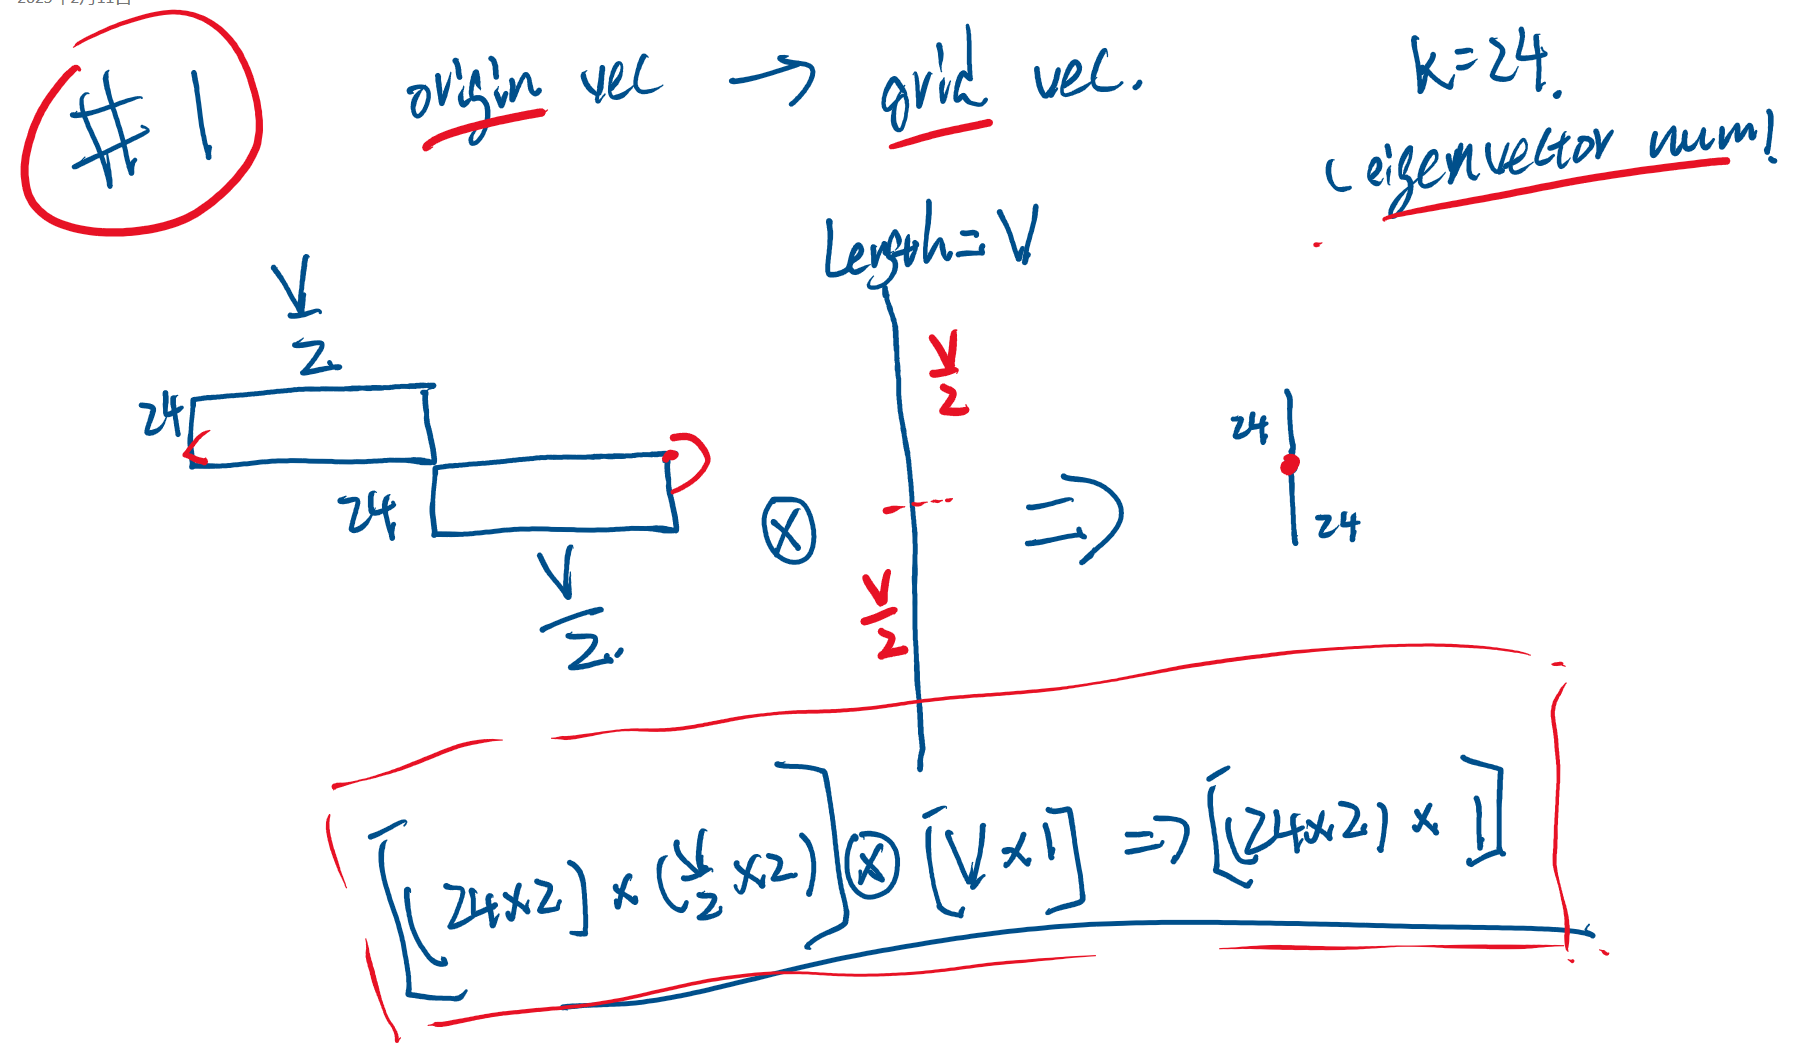


In [15]:
fermion_in = io.xxxtzyx2mg_xxxtzyx(input_array=fermion_in, params=params)
eigenvectors = io.xxxtzyx2mg_xxxtzyx(input_array=eigenvectors, params=params)

Input Array Shape: (2, 4, 3, 32, 32, 32, 16)
Dest Shape: (2, 4, 3, 4, 8, 2, 16, 2, 16, 2, 8)
Input Array Shape: (24, 4, 3, 32, 32, 32, 16)
Dest Shape: (24, 4, 3, 4, 8, 2, 16, 2, 16, 2, 8)


# End for pyqcu. (pass, don't run this)

In [17]:
# qcu.applyEndQcu(set_ptrs, params)
# qcu.applyEndQcu(set_ptrs, wilson_dslash_eo_params)
# qcu.applyEndQcu(set_ptrs, wilson_dslash_oe_params)
# qcu.applyEndQcu(set_ptrs, wilson_dslash_eo_dag_params)
# qcu.applyEndQcu(set_ptrs, wilson_dslash_oe_dag_params)